## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
complete_data = complete_data.sort_values(['Timepoint'])
# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1529,s619,Stelasyn,Male,22,30,0,45.0,0
558,a818,Naftisol,Female,12,28,0,45.0,0
1531,t198,Propriva,Male,22,26,0,45.0,0
551,a788,Zoniferol,Male,5,30,0,45.0,0


In [2]:
# Checking the number of mice.
mouse_count = complete_data['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = complete_data.duplicated(['Mouse ID', 'Timepoint'])

In [4]:
duplicate_data = complete_data.loc[duplicates]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
complete_data.loc[complete_data['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
908,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=complete_data.loc[complete_data['Mouse ID'] != 'g989']
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1529,s619,Stelasyn,Male,22,30,0,45.000000,0
558,a818,Naftisol,Female,12,28,0,45.000000,0
1531,t198,Propriva,Male,22,26,0,45.000000,0
551,a788,Zoniferol,Male,5,30,0,45.000000,0
...,...,...,...,...,...,...,...,...
174,a644,Ramicane,Female,7,17,45,32.978522,1
679,c402,Stelasyn,Female,1,27,45,74.040390,3
689,c559,Zoniferol,Female,19,28,45,61.840058,4
706,c757,Placebo,Male,9,27,45,69.042841,3


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [8]:
# Create basic summary table with Drug types and trial numbers
summary_stats = pd.DataFrame(clean_data.groupby('Drug Regimen').count())

# Calculate summary statistics by drug type
summary_stats['Mean Tumor Volume'] = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
summary_stats['Median Tumor Volume'] = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
summary_stats['Tumor Volume Variance'] = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
summary_stats['Tumor Volume St. Dev.'] = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
summary_stats['Tumor Volume St. Error'] = pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())
summary_stats

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = summary_stats[['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume St. Dev.', 'Tumor Volume St. Error']]
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem'])

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice')

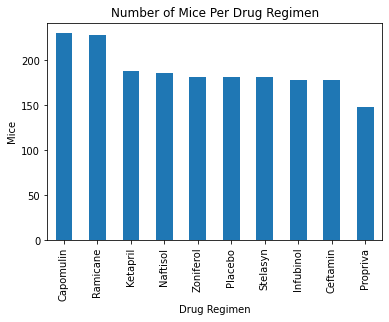

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_drug = pd.DataFrame(clean_data['Drug Regimen'].value_counts())
mice_per_drug

mice_per_drug.plot.bar(y='Drug Regimen', rot=90, legend=False)
plt.title('Number of Mice Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice')

Text(0.5, 1.0, 'Mice per Drug Regimen')

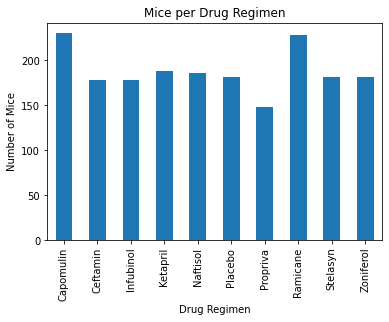

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_group = clean_data.groupby('Drug Regimen')
count_mice = drug_group['Drug Regimen'].count()
count_mice

mice_drug_chart = count_mice.plot(kind='bar')
mice_drug_chart.set_ylabel('Number of Mice')
mice_drug_chart.set_title('Mice per Drug Regimen')

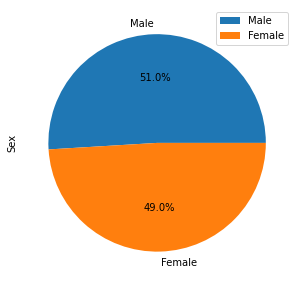

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = pd.DataFrame(clean_data['Sex'].value_counts())
mice_gender

mice_gender.plot.pie(y='Sex', figsize=(5,5), autopct='%1.1f%%')

Text(0.5, 1.0, 'Mice per Gender')

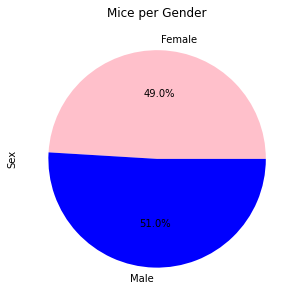

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender = clean_data.groupby('Sex')
count_mice = mouse_gender['Sex'].count()
count_mice

colors=['pink', 'blue']
mouse_gender_chart = count_mice.plot(kind='pie', figsize= (5,5), autopct='%1.1f%%', colors=colors)
# mice_gender_chart.set_ylabel('Number of Mice')
mouse_gender_chart.set_title('Mice per Gender')

## Quartiles, Outliers and Boxplots

In [ ]:
x = ['Timepoint']
while x == 45
    

In [32]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1529,s619,Stelasyn,Male,22,30,0,45.000000,0
558,a818,Naftisol,Female,12,28,0,45.000000,0
1531,t198,Propriva,Male,22,26,0,45.000000,0
551,a788,Zoniferol,Male,5,30,0,45.000000,0
...,...,...,...,...,...,...,...,...
174,a644,Ramicane,Female,7,17,45,32.978522,1
679,c402,Stelasyn,Female,1,27,45,74.040390,3
689,c559,Zoniferol,Female,19,28,45,61.840058,4
706,c757,Placebo,Male,9,27,45,69.042841,3


In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cols=['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']
test=clean_data[cols]
test
# Start by getting the last (greatest) timepoint for each mouse
# last_timepoint = clean_data.loc(clean_data['Timepoint'] == '45')
# last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Ramicane,0,45.000000
1529,Stelasyn,0,45.000000
558,Naftisol,0,45.000000
1531,Propriva,0,45.000000
551,Zoniferol,0,45.000000
...,...,...,...
174,Ramicane,45,32.978522
679,Stelasyn,45,74.040390
689,Zoniferol,45,61.840058
706,Placebo,45,69.042841


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
